### **Import Library**

In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.9 MB/s 
     |████████████████████████████████| 1.6 MB 46.1 MB/s 
  Created wheel for jcopml: filename=jcopml-1.2.0-py2.py3-none-any.whl size=32031 sha256=a4de243babe2ad79883a4b98cd06866af723b6641231ad58a85d45a437f5b32e
  Stored in directory: /root/.cache/pip/wheels/a9/d5/b1/ca51d2753a1675d3df3468e01dd5dd83f960ea567b45d21843
Successfully built jcopml


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

baca dataset

In [ ]:
df = pd.read_csv("data end to end.csv")

#Tampilkan bentuk dari dataset
print(df.shape)

#Tampilkan 5 data teratas
print(df.head())

(13, 23)
              Step  Total_AugSep  Total_Sep-Okt  Total_Okt-Nov  Total_Aug-Nov  \
0   First Open App            32             54             54            140   
1  Read Onboarding            29             53             52            134   
2          Sign Up            22             35             40             97   
3       Load Topic            18             28             34             80   
4    Topic Choosed            15             26             30             71   

   Conv_AugSep  Conv_SepOkt  Conv_Okt-Nov  Conv_Aug-Nov  ConvP_AugSep  ...  \
0            0            0             0             0             0  ...   
1            3            1             2             6           103  ...   
2            7           18            12            37           318  ...   
3            4            7             6            17           222  ...   
4            3            2             4             9           200  ...   

   AVGT_AugSep  AVGT_SepOkt  AVGT_O

### **EDA**

visualisasi persentase churn

In [ ]:
deskriptif = df.drop(['Churn_analysis_AugSept','Churn_analysis_SeptOkt','Churn_analysis_Okt-Nov','Churn_analysis_Aug-Nov','rata-rata','Churn'], axis=1)
deskriptif

,Step,Total_AugSep,Total_Sep-Okt,Total_Okt-Nov,Total_Aug-Nov,Conv_AugSep,Conv_SepOkt,Conv_Okt-Nov,Conv_Aug-Nov,ConvP_AugSep,ConvP-SepOkt,ConvP_OktNov,ConvP_AugNov,AVGT_AugSep,AVGT_SepOkt,AVGT_OktNov,AVGT_AugNov
0,First Open App,32,54,54,140,0,0,0,0,0,0,0,0,0,0,0,0
1,Read Onboarding,29,53,52,134,3,1,2,6,103,19,39,45,0,660,1230,738
2,Sign Up,22,35,40,97,7,18,12,37,318,514,300,381,20160,34200,24120,27000
3,Load Topic,18,28,34,80,4,7,6,17,222,250,177,213,276480,95040,3258,95040
4,Topic Choosed,15,26,30,71,3,2,4,9,200,77,133,127,1572,5040,2184,3132
5,Load Learning Page,15,26,30,71,0,0,0,0,0,0,0,0,0,0,0,0
6,Sub Topic Choosed,14,24,30,68,1,2,0,3,71,83,0,44,24,6,100,51
7,Read Material,14,24,30,68,0,0,0,0,0,0,0,0,0,0,0,0
8,Correct Answer Quiz,11,18,22,51,3,6,8,17,273,333,364,333,77,155520,14400,60840
9,Finish Hooray,11,18,22,51,0,0,0,0,0,0,0,0,18,13,23,19


In [ ]:
deskriptif.describe()

,Total_AugSep,Total_Sep-Okt,Total_Okt-Nov,Total_Aug-Nov,Conv_AugSep,Conv_SepOkt,Conv_Okt-Nov,Conv_Aug-Nov,ConvP_AugSep,ConvP-SepOkt,ConvP_OktNov,ConvP_AugNov,AVGT_AugSep,AVGT_SepOkt,AVGT_OktNov,AVGT_AugNov
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,15.846154,26.692308,30.307692,72.846154,1.846154,3.307692,2.923077,8.076923,118.000000,143.615385,104.615385,119.615385,23368.461538,35642.230769,5181.076923,20413.230769
std,7.646853,13.579302,12.378642,33.488421,2.115268,5.105301,3.796084,10.578764,117.076898,191.684436,127.693343,134.330772,76256.230471,63086.978350,8847.426777,34418.357091
min,8.000000,11.000000,16.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,18.000000,22.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,14.000000,24.000000,30.000000,68.000000,1.000000,1.000000,2.000000,6.000000,103.000000,77.000000,39.000000,45.000000,24.000000,68.000000,100.000000,70.000000
75%,18.000000,28.000000,34.000000,80.000000,3.000000,6.000000,4.000000,9.000000,222.000000,250.000000,177.000000,213.000000,1572.000000,34200.000000,3258.000000,27000.000000
max,32.000000,54.000000,54.000000,140.000000,7.000000,18.000000,12.000000,37.000000,318.000000,514.000000,364.000000,381.000000,276480.000000,172800.000000,24120.000000,95040.000000


Text(0.5, 0, 'Statistik Deskriptif')

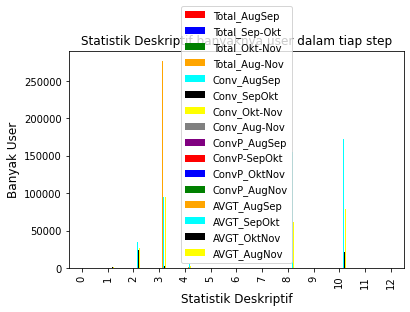

In [ ]:
plt.figure;
deskriptif.plot(kind="bar", color=['red','blue','green','orange','cyan','black','yellow','gray','purple']);
plt.title('Statistik Deskriptif banyaknya user dalam tiap step', size=12)
plt.ylabel('Banyak User', size=12)
plt.xlabel('Statistik Deskriptif', size=12)

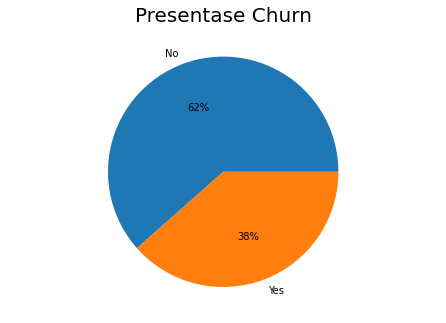

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Presentase Churn", fontsize=20)
plt.show()

(EDA) Variabel Numerik

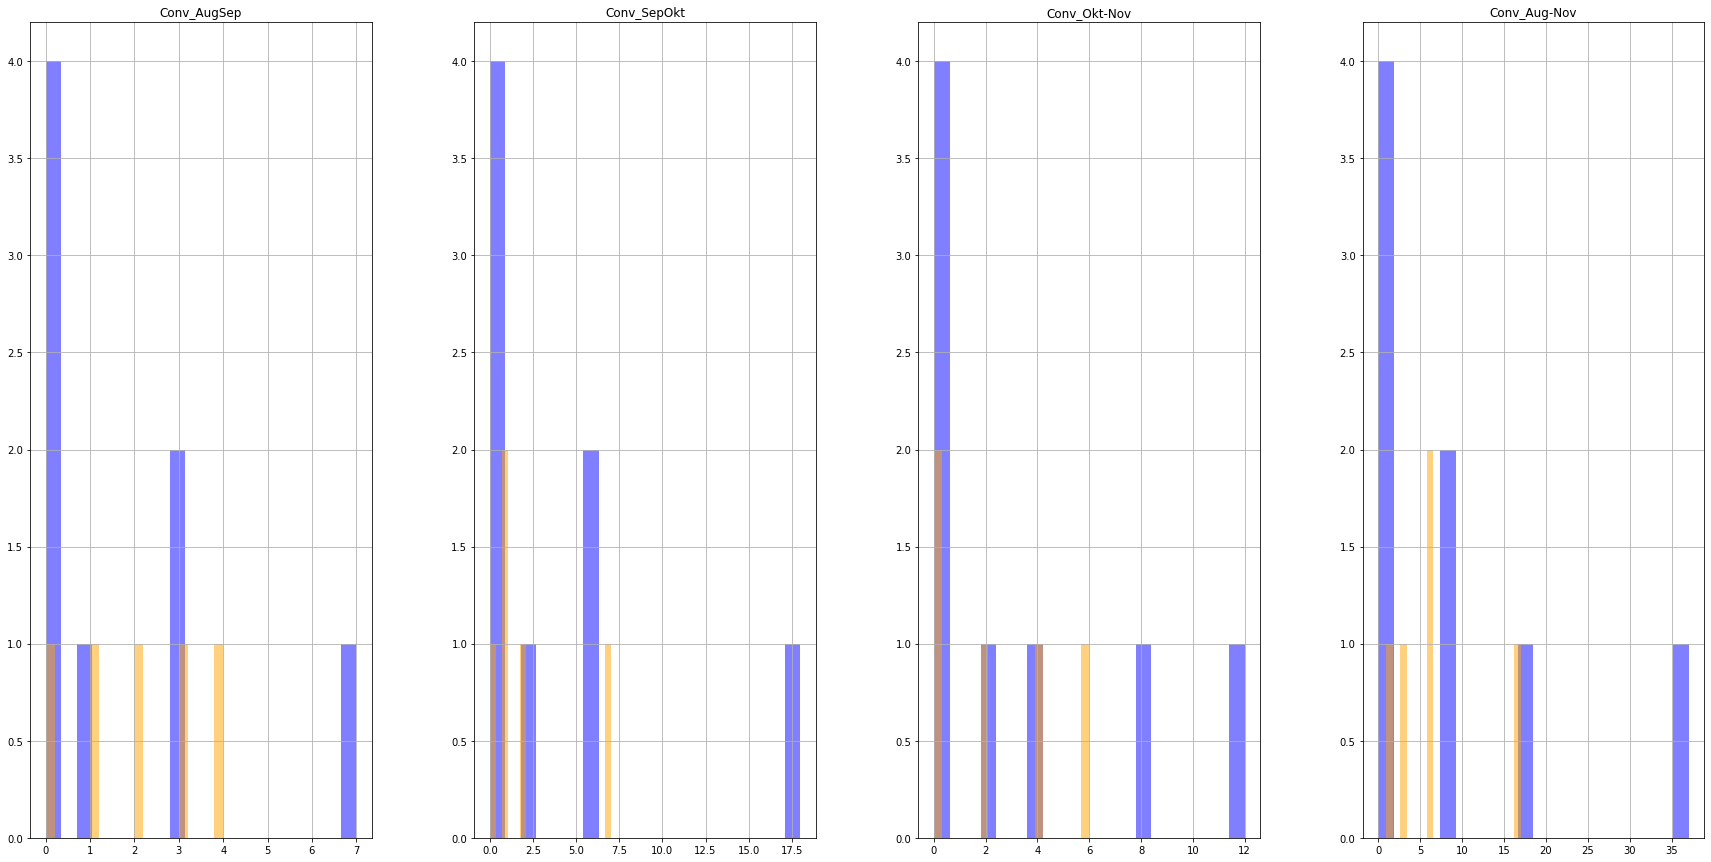

In [ ]:
numerical_features = ['Conv_AugSep', 'Conv_SepOkt', 'Conv_Okt-Nov','Conv_Aug-Nov']
fig, ax = plt.subplots(1, 4, figsize=(30, 15))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

### Deskriptif Statistik

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in df.columns:
    if df[column].dtype == np.number: continue
    #Perform encoding for each non-numeric column
    df[column] = LabelEncoder().fit_transform(df[column])
print(df.describe())

            Step  Total_AugSep  Total_Sep-Okt  Total_Okt-Nov  Total_Aug-Nov  \
count  13.000000     13.000000      13.000000       13.00000      13.000000   
mean    5.307692      3.461538       3.615385        3.00000       4.384615   
std     3.520999      2.536907       2.364264        2.12132       2.662657   
min     0.000000      0.000000       0.000000        0.00000       0.000000   
25%     3.000000      2.000000       2.000000        2.00000       3.000000   
50%     5.000000      3.000000       3.000000        3.00000       4.000000   
75%     8.000000      5.000000       5.000000        4.00000       6.000000   
max    11.000000      8.000000       8.000000        7.00000       9.000000   

       Conv_AugSep  Conv_SepOkt  Conv_Okt-Nov  Conv_Aug-Nov  ConvP_AugSep  \
count    13.000000    13.000000     13.000000     13.000000     13.000000   
mean      1.692308     1.615385      1.384615      2.538462      2.538462   
std       1.750458     1.709701      1.709701      2.1838

<ipython-input-6-c5fb6dc803df>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue


### analisis pengaruh dari rata - rata waktu pengerjaan dengan penurunan user

import dataset

In [ ]:
dataset = pd.read_csv('data end to end.csv')
X = pd.DataFrame(dataset['Conv_AugSep'])
y = pd.DataFrame(dataset['AVGT_AugSep'])

Training Set dan Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

Fitting Simple Linear Regression terhadap Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

prediksi set test

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 69123.15],
       [ 69123.15],
       [207361.05],
       [138242.1 ],
       [483836.85],
       [207361.05],
       [207361.05]])

visualisasi training set

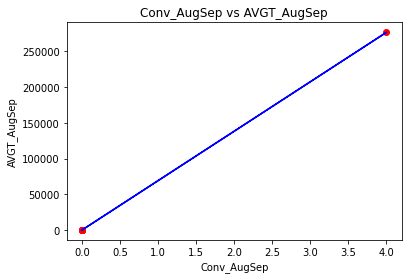

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Conv_AugSep vs AVGT_AugSep')
plt.xlabel('Conv_AugSep')
plt.ylabel('AVGT_AugSep')
plt.show()

visualisasi set test

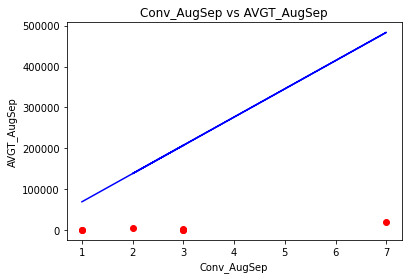

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Conv_AugSep vs AVGT_AugSep')
plt.xlabel('Conv_AugSep')
plt.ylabel('AVGT_AugSep')
plt.show()

### pemodelan lain simple linear regression

import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import data

In [ ]:
delivery = pd.read_csv('data end to end.csv')
print(delivery.head())
delivery.shape

              Step  Total_AugSep  Total_Sep-Okt  Total_Okt-Nov  Total_Aug-Nov  \
0   First Open App            32             54             54            140   
1  Read Onboarding            29             53             52            134   
2          Sign Up            22             35             40             97   
3       Load Topic            18             28             34             80   
4    Topic Choosed            15             26             30             71   

   Conv_AugSep  Conv_SepOkt  Conv_Okt-Nov  Conv_Aug-Nov  ConvP_AugSep  ...  \
0            0            0             0             0             0  ...   
1            3            1             2             6           103  ...   
2            7           18            12            37           318  ...   
3            4            7             6            17           222  ...   
4            3            2             4             9           200  ...   

   AVGT_AugSep  AVGT_SepOkt  AVGT_OktNov  AV

(13, 23)

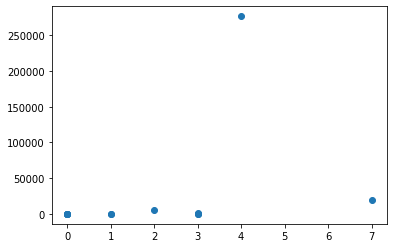

In [ ]:
plt.scatter(delivery['Conv_AugSep'],delivery['AVGT_AugSep'])

mencari korelasi

In [ ]:
delivery.corr(method = 'pearson')

,Total_AugSep,Total_Sep-Okt,Total_Okt-Nov,Total_Aug-Nov,Conv_AugSep,Conv_SepOkt,Conv_Okt-Nov,Conv_Aug-Nov,ConvP_AugSep,ConvP-SepOkt,...,ConvP_AugNov,AVGT_AugSep,AVGT_SepOkt,AVGT_OktNov,AVGT_AugNov,Churn_analysis_AugSept,Churn_analysis_SeptOkt,Churn_analysis_Okt-Nov,Churn_analysis_Aug-Nov,rata-rata
Total_AugSep,1.000000,0.990625,0.991833,0.996655,0.261164,0.105909,0.079940,0.132018,-0.031089,-0.143141,...,-0.122238,0.097220,-0.262175,-0.063142,-0.144053,-0.036512,-0.161088,-0.142123,-0.144956,-0.134370
Total_Sep-Okt,0.990625,1.000000,0.987165,0.996590,0.230310,0.026722,0.038301,0.072692,-0.043349,-0.219256,...,-0.171660,0.038568,-0.236645,-0.057013,-0.150938,-0.043994,-0.239422,-0.158098,-0.189954,-0.177518
Total_Okt-Nov,0.991833,0.987165,1.000000,0.996406,0.262931,0.093319,0.064389,0.120715,-0.042321,-0.174002,...,-0.149968,0.101317,-0.290757,-0.090884,-0.165257,-0.046364,-0.189401,-0.170720,-0.172702,-0.160276
Total_Aug-Nov,0.996655,0.996590,0.996406,1.000000,0.250213,0.069513,0.057585,0.104242,-0.040320,-0.185910,...,-0.152953,0.075289,-0.263299,-0.071131,-0.155183,-0.043315,-0.203877,-0.159665,-0.173962,-0.161909
Conv_AugSep,0.261164,0.230310,0.262931,0.250213,1.000000,0.845870,0.932432,0.942764,0.891719,0.620941,...,0.798661,0.362685,0.370612,0.690479,0.492708,0.880580,0.628936,0.776914,0.795724,0.812072
Conv_SepOkt,0.105909,0.026722,0.093319,0.069513,0.845870,1.000000,0.869909,0.963892,0.730144,0.873226,...,0.865115,0.277710,0.179187,0.603001,0.306402,0.702984,0.863815,0.686376,0.838142,0.836277
Conv_Okt-Nov,0.079940,0.038301,0.064389,0.057585,0.932432,0.869909,1.000000,0.965101,0.936022,0.712409,...,0.914930,0.299800,0.550912,0.810112,0.595284,0.911794,0.718884,0.917509,0.902856,0.911625
Conv_Aug-Nov,0.132018,0.072692,0.120715,0.104242,0.942764,0.963892,0.965101,1.000000,0.866552,0.801219,...,0.905513,0.314123,0.358270,0.719772,0.460000,0.842523,0.800599,0.815831,0.887576,0.893091
ConvP_AugSep,-0.031089,-0.043349,-0.042321,-0.040320,0.891719,0.730144,0.936022,0.866552,1.000000,0.650961,...,0.899714,0.312554,0.667959,0.791009,0.684884,0.997491,0.668605,0.957782,0.914632,0.928187
ConvP-SepOkt,-0.143141,-0.219256,-0.174002,-0.185910,0.620941,0.873226,0.712409,0.801219,0.650961,1.000000,...,0.901572,0.205411,0.186187,0.421249,0.253643,0.641192,0.994969,0.678608,0.890091,0.876475


pemodelan regresi linier sederhana

In [ ]:
x_distance = delivery['AVGT_AugSep']
X_distance = x_distance[:, np.newaxis]
y_delivery = delivery['Conv_AugSep'].values

regressor = LinearRegression()
model = regressor.fit(X_distance, y_delivery)

<ipython-input-17-d253bb82537d>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_distance = x_distance[:, np.newaxis]


In [ ]:
regressor.coef_

array([1.00605101e-05])

In [ ]:
regressor.intercept_

1.6110552038911965

hasil pemodelan

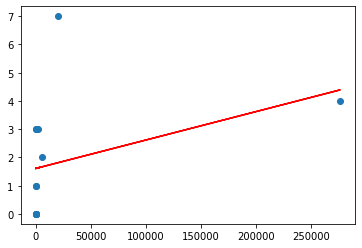

In [ ]:
plt.scatter(X_distance, y_delivery)

y_pred = regressor.predict(X_distance)
plt.plot(X_distance, y_pred, color = 'red')